In [1]:
import pandas as pd

In [2]:
urop_path = '/home/gridsan/afogelson/osfm/scripts/urop_samples/uniform_sample/uniform_urop_sample_alex_labeled_PROMPT7.csv'
df = pd.read_csv(urop_path)

y_label, x_label = 'alex2', 'mcllm_binary'
df = df[~df[y_label].isna() & ~df[x_label].isna()]
df['urop'] = df['urop'].apply(str.lower)
df = df[df['urop'] != 'select']

In [3]:
df['mcllm_binary_stripped'] = df['mcllm_binary'].apply(lambda s: tuple(v.lstrip("('").rstrip("')") for v in s.split(","))[0])
df['mcllm_binary_stripped']
df = df[df['mcllm_binary_stripped'] != 'unclear']
x_label = 'mcllm_binary_stripped'

In [4]:
set(df['mcllm_binary_stripped'])

{'context', 'uses'}

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(0)
train_size = 100
true, pred = np.random.permutation(df[y_label])[:train_size], np.random.permutation(df[x_label])[:train_size]

mapping = lambda s: {'background': 'context',
                     'future_work': 'context',
                    'differences': 'context',
                     'future work': 'context',
                     'motivation': 'context',
                     'similarities': 'context',
                     'extends': 'uses',
                     '*': 'context'
                     }.get(s) or s
true, pred = list(map(mapping, true)), list(map(mapping, pred))

cm = confusion_matrix(true, pred)

Text(50.722222222222214, 0.5, 'alex2')

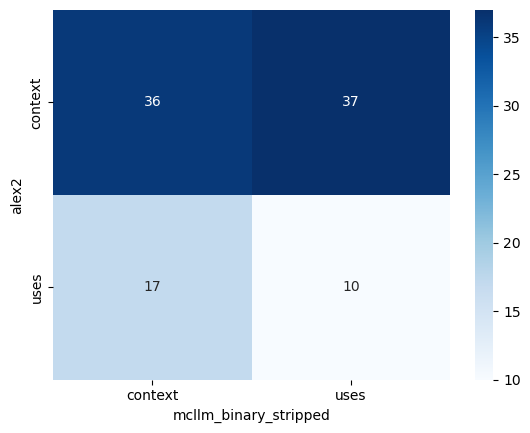

In [6]:
#assert(len(set(true)) == 3), set(true)
#assert(len(set(pred)) == 3), set(pred)
#labels = ['context', 'extends', 'uses']


labels = ['context', 'uses']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel(x_label)
plt.ylabel(y_label)

In [7]:
false_positives = (cm - cm * np.identity(len(labels))).sum(axis = 0)/cm.sum(axis = 0)
false_negatives = (cm - cm * np.identity(len(labels))).sum(axis = 1)/cm.sum(axis = 1)

print(false_positives)
print(false_negatives)

[0.32075472 0.78723404]
[0.50684932 0.62962963]


In [8]:
idx = 0

In [12]:
def get_examples(y_value, x_value):
    mask = (df[y_label].apply(mapping) == y_value) & (df[x_label].apply(mapping) == x_value) 
    return df[mask]

samples = get_examples(y_value='context', x_value = 'uses')
print(f"Drawing from {len(samples)} samples")
print(samples['modelKey'].iloc[idx])

print(samples['multisentence'].iloc[idx])
print(samples['mcllm_binary'].iloc[idx])
print(samples[y_label].iloc[idx])
print(samples[x_label].iloc[idx])
idx += 1

Drawing from 47 samples
706_codex
the second way is more suitable for "human-in-the-loop" style expert systems. since the general capabilities to generate valid python code were demonstrated by the original openai paper (<cite>chen et al, 2021</cite>), our study focused exclusively on simulation models of inventory and queuing systems written in python. the gpt-based framework has been finetuned in order to produce valid executable python code based on the descriptions of a single-server queuing system and single-product inventory-control system.
('uses', "The citation indicates that the CITED model (gpt-based framework) was used to generate valid executable python code based on descriptions of inventory and queuing systems. This is an example of the 'uses' classification, as the CITED model's weights are being directly employed in the methodology to accomplish a specific task.")
background
uses
